In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('data/raw/train_FD001.txt', sep=" ", header=None)

In [3]:
columns = [
    # Index Names
    "engine",   # Engine No.
    "cycle",    # Time, In Cycles

    # Setting Names
    "setting1",  # Operation Setting 1
    "setting2",  # Operation Setting 2
    "setting3",  # Operation Setting 3

    # Sensor Names (full names)
    "Fan Inlet Temperature (°R)",
    "LPC Outlet Temperature (°R)",
    "HPC Outlet Temperature (°R)",
    "LPT Outlet Temperature (°R)",
    "Fan Inlet Pressure (psia)",
    "Bypass-Duct Pressure (psia)",
    "HPC Outlet Pressure (psia)",
    "Physical Fan Speed (rpm)",
    "Physical Core Speed (rpm)",
    "Engine Pressure Ratio (P50/P2)",
    "HPC Outlet Static Pressure (psia)",
    "Ratio of Fuel Flow to Ps30 (pps/psia)",
    "Corrected Fan Speed (rpm)",
    "Corrected Core Speed (rpm)",
    "Bypass Ratio",
    "Burner Fuel-Air Ratio",
    "Bleed Enthalpy",
    "Required Fan Speed",
    "Required Fan Conversion Speed",
    "High-Pressure Turbines Cool Air Flow",
    "Low-Pressure Turbines Cool Air Flow"
]


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [5]:
# drop the last two columns which are empty
df = df.drop(columns=[26, 27])

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
df.columns = columns

In [8]:
df.head()

,engine,cycle,setting1,setting2,setting3,Fan Inlet Temperature (°R),LPC Outlet Temperature (°R),HPC Outlet Temperature (°R),LPT Outlet Temperature (°R),Fan Inlet Pressure (psia),...,Ratio of Fuel Flow to Ps30 (pps/psia),Corrected Fan Speed (rpm),Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


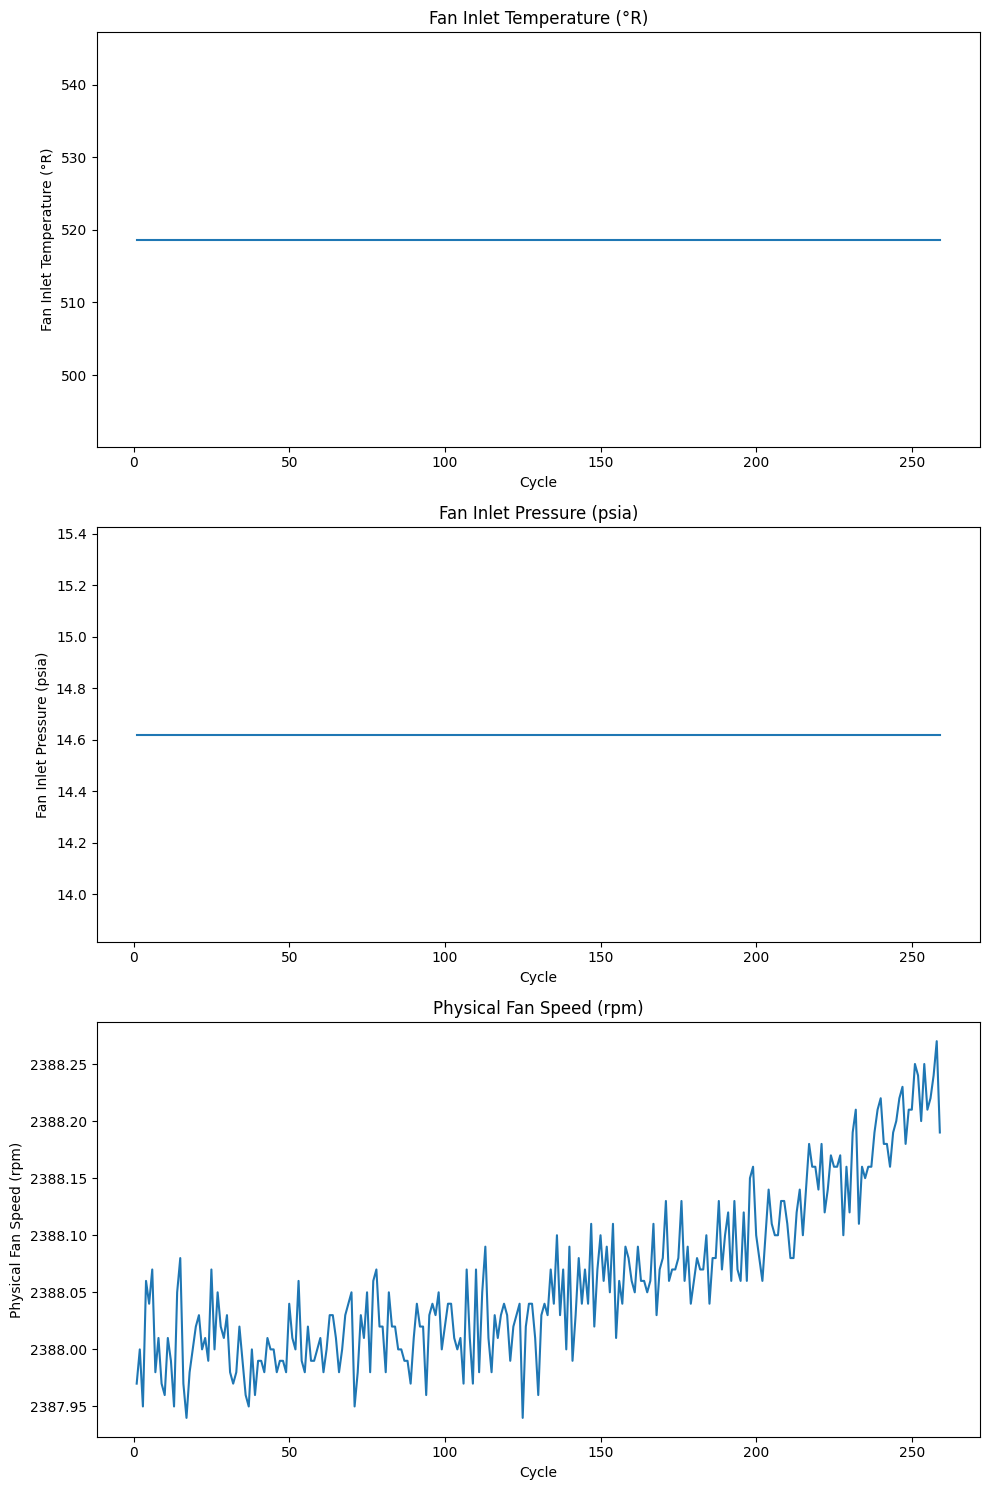

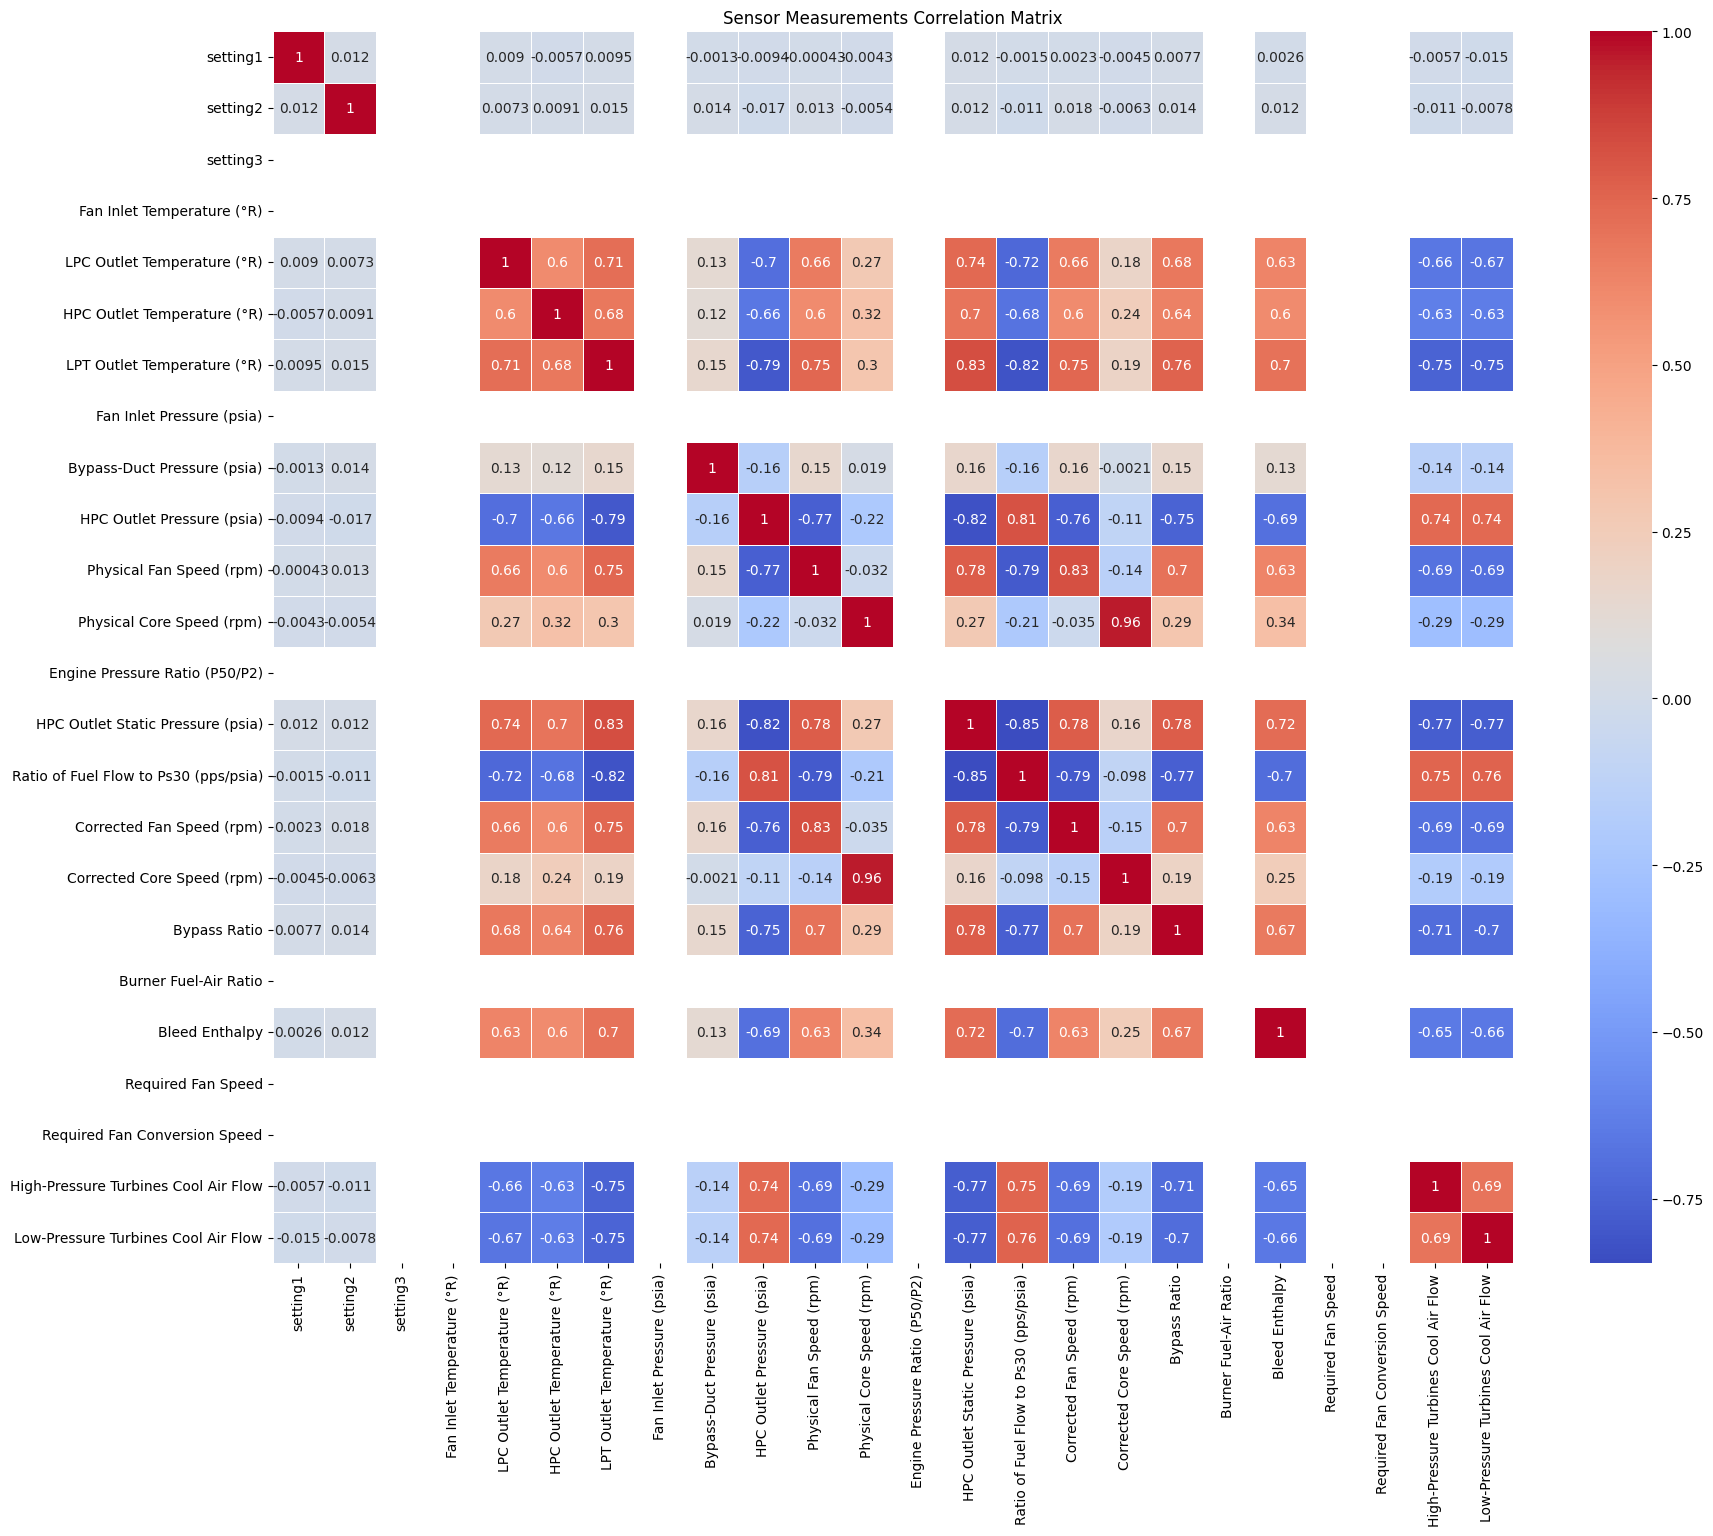

Dataset Summary:
--------------------------------------------------
Number of engines: 100
Average cycles per engine: 206.31
Sequence shape: (17631, 30, 24)
Target shape: (17631,)
Min RUL: 1.00
Max RUL: 332.00

Data Quality Check:
--------------------------------------------------
Missing values:
0


In [20]:
# plot all cycles for engine 1 for sensor "Fan Inlet Temperature (°R)", "Fan Inlet Pressure (psia)", "Physical Fan Speed (rpm)" in 3 subplots
engine_1 = df[df['engine'] == 7]

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].plot(engine_1['cycle'], engine_1['Fan Inlet Temperature (°R)'])
axs[0].set_title('Fan Inlet Temperature (°R)')
axs[0].set_xlabel('Cycle')
axs[0].set_ylabel('Fan Inlet Temperature (°R)')
axs[1].plot(engine_1['cycle'], engine_1['Fan Inlet Pressure (psia)'])
axs[1].set_title('Fan Inlet Pressure (psia)')
axs[1].set_xlabel('Cycle')
axs[1].set_ylabel('Fan Inlet Pressure (psia)')
axs[2].plot(engine_1['cycle'], engine_1['Physical Fan Speed (rpm)'])
axs[2].set_title('Physical Fan Speed (rpm)')
axs[2].set_xlabel('Cycle')
axs[2].set_ylabel('Physical Fan Speed (rpm)')
plt.tight_layout()
plt.show()

# Calculate and visualize correlations between sensors
sensor_cols = [col for col in df.columns if col not in ['engine', 'cycle']]
correlation_matrix = df[sensor_cols].corr()

plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Sensor Measurements Correlation Matrix')
plt.show()

# Normalize sensor data
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[sensor_cols] = scaler.fit_transform(df[sensor_cols])

def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    
    for engine in data['engine'].unique():
        engine_data = data[data['engine'] == engine]
        max_cycles = engine_data['cycle'].max()
        
        for i in range(len(engine_data) - sequence_length):
            sequence = engine_data.iloc[i:(i + sequence_length)]
            target = max_cycles - (i + sequence_length)  # RUL
            sequences.append(sequence[sensor_cols].values)
            targets.append(target)
            
    return np.array(sequences), np.array(targets)

# Create sequences with 30-cycle lookback
sequence_length = 30
X, y = create_sequences(df_normalized, sequence_length)

# Print dataset statistics
print("Dataset Summary:")
print("-" * 50)
print(f"Number of engines: {len(df['engine'].unique())}")
print(f"Average cycles per engine: {df.groupby('engine')['cycle'].max().mean():.2f}")
print(f"Sequence shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Min RUL: {y.min():.2f}")
print(f"Max RUL: {y.max():.2f}")

# Check for data quality
print("\nData Quality Check:")
print("-" * 50)
print("Missing values:")
print(df_normalized.isna().sum().sum())

# Save processed data
np.save('data/processed/X_sequences.npy', X)
np.save('data/processed/y_sequences.npy', y)
df_normalized.to_csv('data/processed/train_FD001_processed.csv', index=False)